<a href="https://colab.research.google.com/github/yejin-park/MachineLearning/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [4]:
samples = 1000
X, y = make_classification(n_samples=samples, n_features=2,
                           n_informative =2, n_redundant=0,
                           n_clusters_per_class=1)

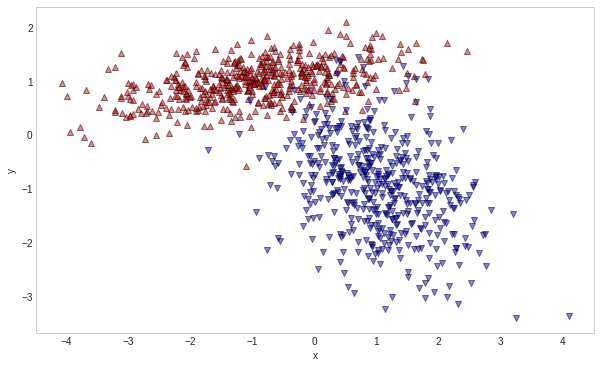

In [6]:
#차트로 나타내기
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(X[i, 0], X[i, 1], edgecolors = 'k', alpha=0.5, marker='^', color='r')
  else:
    ax.scatter(X[i,0], X[i, 1], edgecolors='k', alpha=0.5, marker='v', color='b')

plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.96625
평가 데이터 점수 : 0.965


In [16]:
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=10)
print("CV 평균 점수 : {}".format(scores.mean()))

CV 평균 점수 : 0.9659999999999999


In [17]:
model.intercept_, model.coef_

(array([1.69697688]), array([[ 1.91923554, -4.26983837]]))

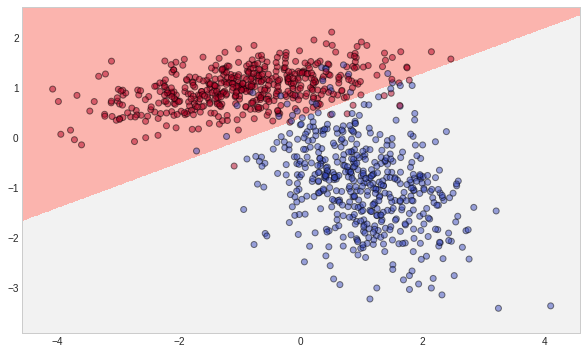

In [21]:
x_min, x_max = X[:, 0].min() -  .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c=np.abs(y-1), edgecolors = 'k', alpha =0.5, cmap = plt.cm.coolwarm)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

## 붓꽃 데이터